# بارگیری دیتاست

In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.autos', 'rec.motorcycles', 'sci.space', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

print(f" Number of training data: {len(newsgroups_train.data)}")
print(f"Number of test data: {len(newsgroups_test.data)}")

 Number of training data: 2379
Number of test data: 1584


# نرمالسازی داده ها


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

print(f" Educational features:{X_train.shape}")
print(f"Test features: {X_test.shape}")

 Educational features:(2379, 35966)
Test features: (1584, 35966)


# نرمالسازی با tf و idf

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# CountVectorizer (Binary)
vectorizer_binary = CountVectorizer(binary=True)
X_train_binary = vectorizer_binary.fit_transform(newsgroups_train.data)
X_test_binary = vectorizer_binary.transform(newsgroups_test.data)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train.data)
X_test_tfidf = tfidf_vectorizer.transform(newsgroups_test.data)

# تقسیم داده ها


In [5]:

#For CountVectorizer
X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(
    X_train_binary, newsgroups_train.target, test_size=0.2, random_state=42
)

#For TF-IDF
X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(
    X_train_tfidf, newsgroups_train.target, test_size=0.2, random_state=42
)


print("CountVectorizer (Binary):")
print(f"Shape of training data: {X_train_binary.shape}")
print(f"Shape of validation data: {X_val_binary.shape}")

print("\nTF-IDF Vectorizer:")
print(f"Shape of training data: {X_train_tfidf.shape}")
print(f"Shape of validation data: {X_val_tfidf.shape}")

CountVectorizer (Binary):
Shape of training data: (1903, 35966)
Shape of validation data: (476, 35966)

TF-IDF Vectorizer:
Shape of training data: (1903, 35966)
Shape of validation data: (476, 35966)


# فاز دوم سوال5

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Model for CountVectorizer (Binary)
mnb_binary = MultinomialNB(alpha=0.1)
mnb_binary.fit(X_train_binary, y_train_binary)

# Model for TF-IDF
mnb_tfidf = MultinomialNB(alpha=0.1)
mnb_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB(alpha=0.1)

# مقادیر مختلف الفا

In [7]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

alphas = [0.01, 0.1, 1, 10] # لیستی از مقادیر مختلف آلفا

results = {}

for alpha in alphas:
    # برای داده های CountVectorizer باینری
    mnb_binary = MultinomialNB(alpha=alpha)
    mnb_binary.fit(X_train_binary, y_train_binary)
    y_pred_binary = mnb_binary.predict(X_val_binary)
    accuracy_binary = accuracy_score(y_val_binary, y_pred_binary)

    #برای داده های TF-IDF
    mnb_tfidf = MultinomialNB(alpha=alpha)
    mnb_tfidf.fit(X_train_tfidf, y_train_tfidf)
    y_pred_tfidf = mnb_tfidf.predict(X_val_tfidf)
    accuracy_tfidf = accuracy_score(y_val_tfidf, y_pred_tfidf)

    results[alpha] = {
        'binary': {'accuracy': accuracy_binary, 'report': classification_report(y_val_binary, y_pred_binary)},
        'tfidf': {'accuracy': accuracy_tfidf, 'report': classification_report(y_val_tfidf, y_pred_tfidf)}
    }

# نمایش نتایج
for alpha, result in results.items():
    print(f"Alpha = {alpha}:")
    print(" CountVectorizer (Binary):")
    print(f"    Accuracy: {result['binary']['accuracy']:.4f}")
    print(f"    Classification Report:\n{result['binary']['report']}")
    print(" TF-IDF:")
    print(f"    Accuracy: {result['tfidf']['accuracy']:.4f}")
    print(f"    Classification Report:\n{result['tfidf']['report']}")
    print("-" * 20)

Alpha = 0.01:
 CountVectorizer (Binary):
    Accuracy: 0.9664
    Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       102
           1       0.93      0.97      0.95       118
           2       0.99      0.98      0.99       137
           3       0.97      0.98      0.97       119

    accuracy                           0.97       476
   macro avg       0.97      0.96      0.97       476
weighted avg       0.97      0.97      0.97       476

 TF-IDF:
    Accuracy: 0.9769
    Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.96      0.97      0.96       118
           2       0.99      0.98      0.99       137
           3       0.98      0.99      0.99       119

    accuracy                           0.98       476
   macro avg       0.98      0.98      0.98       476
weighted avg       0.98      0.98      

#  اموزش و پیش بینی مدل

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# بهترین آلفا را از نتایج مرحله قبل انتخاب کنید (مثلا فرض کنید بهترین آلفا 0.1 باشد)
best_alpha = 0.1

# مدل برای CountVectorizer (Binary)
mnb_binary = MultinomialNB(alpha=best_alpha)
mnb_binary.fit(X_train_binary, y_train_binary)
y_pred_binary_test = mnb_binary.predict(X_test_binary)
accuracy_binary_test = accuracy_score(newsgroups_test.target, y_pred_binary_test)

# مدل برای TF-IDF
mnb_tfidf = MultinomialNB(alpha=best_alpha)
mnb_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf_test = mnb_tfidf.predict(X_test_tfidf)
accuracy_tfidf_test = accuracy_score(newsgroups_test.target, y_pred_tfidf_test)


print(f"نتایج بر روی داده های تست با آلفا = {best_alpha}:")
print("CountVectorizer (Binary):")
print(f"    Accuracy: {accuracy_binary_test:.4f}")
print(f"    Classification Report:\n{classification_report(newsgroups_test.target, y_pred_binary_test)}")

print("\nTF-IDF:")
print(f"    Accuracy: {accuracy_tfidf_test:.4f}")
print(f"    Classification Report:\n{classification_report(newsgroups_test.target, y_pred_tfidf_test)}")

نتایج بر روی داده های تست با آلفا = 0.1:
CountVectorizer (Binary):
    Accuracy: 0.9577
    Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       396
           1       0.94      0.96      0.95       398
           2       0.99      0.94      0.96       396
           3       0.98      0.97      0.97       394

    accuracy                           0.96      1584
   macro avg       0.96      0.96      0.96      1584
weighted avg       0.96      0.96      0.96      1584


TF-IDF:
    Accuracy: 0.9577
    Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       396
           1       0.95      0.96      0.96       398
           2       0.98      0.92      0.95       396
           3       0.97      0.97      0.97       394

    accuracy                           0.96      1584
   macro avg       0.96      0.96      0.96      1584
weighted avg 

# ارزیابی مدل

--- CountVectorizer (Binary) - Classes [0, 1] ---
Accuracy: 0.9622
Precision: 0.6439
Recall: 0.6415
F1-score: 0.6427


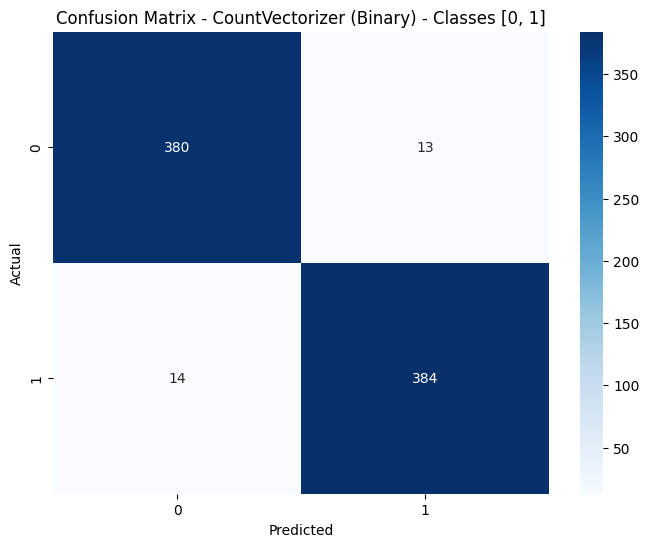

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       396
           1       0.97      0.96      0.97       398

   micro avg       0.97      0.96      0.96       794
   macro avg       0.97      0.96      0.96       794
weighted avg       0.97      0.96      0.96       794

--------------------
--- TF-IDF - Classes [0, 1] ---
Accuracy: 0.9673
Precision: 0.4886
Recall: 0.4836
F1-score: 0.4861


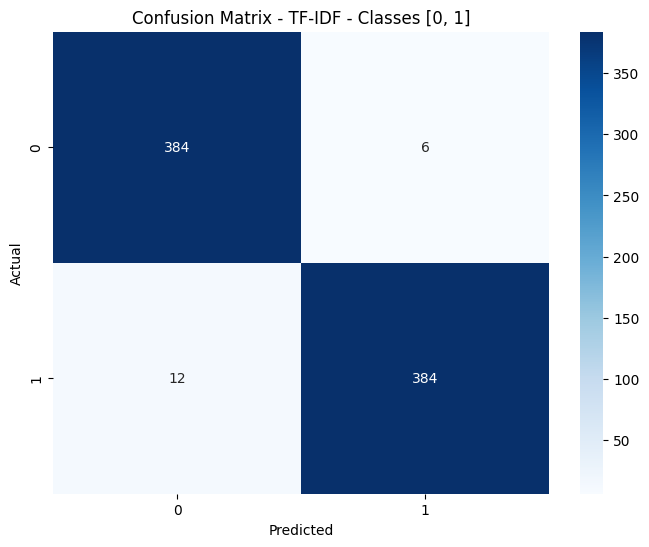

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       396
           1       0.98      0.96      0.97       398

   micro avg       0.98      0.97      0.97       794
   macro avg       0.98      0.97      0.97       794
weighted avg       0.98      0.97      0.97       794

--------------------
--- Mean Metrics ---
Mean Accuracy: 0.9647
Mean Precision: 0.5662
Mean Recall: 0.5626
Mean F1-score: 0.5644


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name, classes):
    """Evaluates the model and plots the confusion matrix and classification report."""
    
    mask = np.isin(y_true, classes)
    y_true_subset = y_true[mask]
    y_pred_subset = y_pred[mask]

    if y_true_subset.size == 0:
        print(f"Warning: No samples found for classes {classes} in {model_name}. Skipping evaluation.")
        return None  # Return None if no samples found

    accuracy = accuracy_score(y_true_subset, y_pred_subset)
    precision = precision_score(y_true_subset, y_pred_subset, average='macro', zero_division=0)
    recall = recall_score(y_true_subset, y_pred_subset, average='macro', zero_division=0)
    f1 = f1_score(y_true_subset, y_pred_subset, average='macro', zero_division=0)

    print(f"--- {model_name} - Classes {classes} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    cm = confusion_matrix(y_true_subset, y_pred_subset, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name} - Classes {classes}")
    plt.show()

    print(f"Classification Report:\n{classification_report(y_true_subset, y_pred_subset, labels=classes, zero_division=0)}")
    print("-" * 20)

    return accuracy, precision, recall, f1  # Return the metrics for averaging

classes_to_evaluate = [0, 1]  # Evaluate the first two classes
results = []

# Evaluate models and collect results
results.append(evaluate_model(newsgroups_test.target, y_pred_binary_test, "CountVectorizer (Binary)", classes_to_evaluate))
results.append(evaluate_model(newsgroups_test.target, y_pred_tfidf_test, "TF-IDF", classes_to_evaluate))

# Filter out None results
results = [result for result in results if result is not None]

# Calculate mean metrics
mean_metrics = np.mean(results, axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1 = mean_metrics

print(f"--- Mean Metrics ---")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-score: {mean_f1:.4f}")


# روش گوسین نایو بیز و برنولی نایو بیز


GaussianNB: Accuracy=0.9369


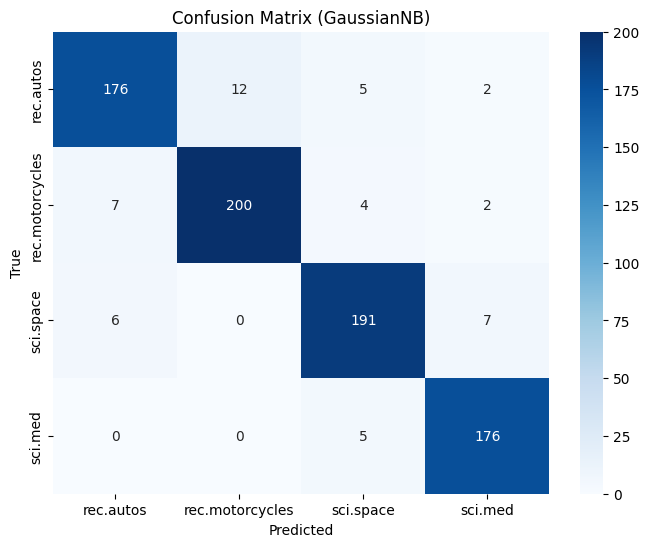

                 precision    recall  f1-score   support

      rec.autos       0.93      0.90      0.92       195
rec.motorcycles       0.94      0.94      0.94       213
      sci.space       0.93      0.94      0.93       204
        sci.med       0.94      0.97      0.96       181

       accuracy                           0.94       793
      macro avg       0.94      0.94      0.94       793
   weighted avg       0.94      0.94      0.94       793

BernoulliNB: Accuracy=0.8991


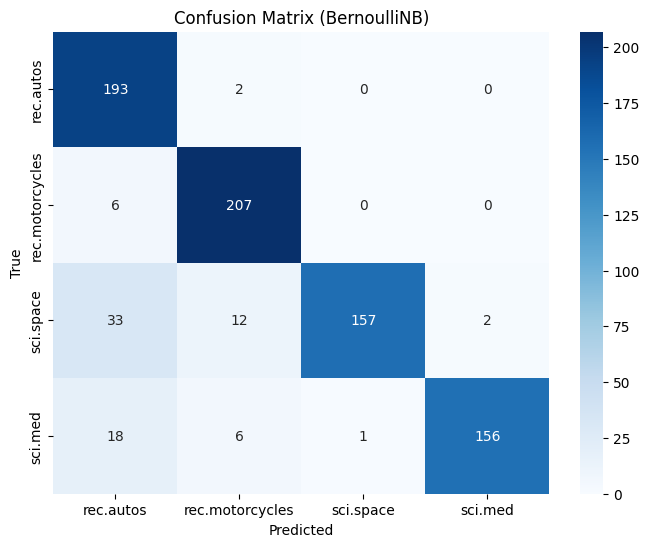

                 precision    recall  f1-score   support

      rec.autos       0.77      0.99      0.87       195
rec.motorcycles       0.91      0.97      0.94       213
      sci.space       0.99      0.77      0.87       204
        sci.med       0.99      0.86      0.92       181

       accuracy                           0.90       793
      macro avg       0.92      0.90      0.90       793
   weighted avg       0.92      0.90      0.90       793



In [10]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# بارگیری دیتاست و انتخاب دسته‌ها
categories = ['rec.autos', 'rec.motorcycles', 'sci.space', 'sci.med']
newsgroup = fetch_20newsgroups(subset='all', categories=categories)

# نرمال‌سازی با CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(newsgroup.data)
y = newsgroup.target

# تقسیم داده‌ها به آموزش و تست
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(newsgroup.data)

count_vectorizer_binary = CountVectorizer(binary=True)
X_count_binary = count_vectorizer_binary.fit_transform(newsgroup.data)

# تقسیم داده‌ها به آموزش و تست
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_count_binary, X_test_count_binary, _, _ = train_test_split(X_count_binary, y, test_size=0.2, random_state=42)


# آموزش و ارزیابی GaussianNB
model_gaussian = GaussianNB()
model_gaussian.fit(X_train_tfidf.toarray(), y_train) # GaussianNB نیاز به آرایه دارد
y_pred_gaussian = model_gaussian.predict(X_test_tfidf.toarray())
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print(f"\nGaussianNB: Accuracy={accuracy_gaussian:.4f}")
cm = confusion_matrix(y_test, y_pred_gaussian)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (GaussianNB)')
plt.show()
print(classification_report(y_test, y_pred_gaussian, target_names=categories))

# آموزش و ارزیابی BernoulliNB
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train_count_binary, y_train)
y_pred_bernoulli = model_bernoulli.predict(X_test_count_binary)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print(f"BernoulliNB: Accuracy={accuracy_bernoulli:.4f}")
cm = confusion_matrix(y_test, y_pred_bernoulli)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (BernoulliNB)')
plt.show()
print(classification_report(y_test, y_pred_bernoulli, target_names=categories))